In [ ]:
 pip install -U ../

In [ ]:

import iesta.machine_learning.dataloader
#from .autonotebook import tqdm as notebook_tqdm
import iesta.stats.significance
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(3,2)}, 
    #style="white" # nicer layout
)


# Running Significance tests on Training sets

In [ ]:
feature_dfs= {}
_, feature_df = iesta.machine_learning.dataloader.load_training_features_df("Liberal")
feature_dfs["liberal"] = feature_df

_, c_feature_df = iesta.machine_learning.dataloader.load_training_features_df("Conservative")
feature_dfs["conservative"] = c_feature_df

In [ ]:
c_feature_df.columns.tolist()

In [ ]:
significance = iesta.stats.significance.run_all_significance_test(feature_dfs)

In [ ]:
for k in significance.keys():
    print(k)


def _get_key(
    ideology, disregard_okay=False, undersampled=False, binary_effect=False
):
    #_okay = "_Okay" if disregard_okay else ""
    _undersampled = "_undersampled" if undersampled else ""
    #_binary = "_binary" if binary_effect else ""
    _key = f"{ideology}_effect{_undersampled}_all_features"
    return _key


def _get_significance(
    ideology,
    #disregard_okay=False, 
    undersampled=False, 
    #binary_effect=False
    threshold: int = 0.03
):
    def _apply_absolute_effect(row):
        effect = row['ineffective effective'] 
        row['absolute_effect'] = effect*(-1) if effect < 0.0 else effect
        return row

    _key = _get_key(ideology, undersampled)
    _df : pd.DataFrame = significance[_key][0].reset_index().copy()
    _df = _df[
        (~_df["feature"].str.endswith("_count"))
       # & (~_df["feature"].str.endswith("_ratio"))
    ]
    if "Unnamed: 0" in _df.columns.tolist():
        del _df["Unnamed: 0"]
    _df = _df.apply(_apply_absolute_effect, axis=1)
    _df = _df.sort_values(by=['absolute_effect'], ascending=False)
    _df = _df[_df['absolute_effect']>=threshold]
    _df.set_index("feature", inplace=True)
    return _df

In [ ]:
conservative_sign = _get_significance(
    "conservative"
)
liberal_sign = _get_significance(
    "liberal",)


In [ ]:
joint_sign = liberal_sign.join(conservative_sign, how='outer', lsuffix="_liberal", rsuffix="_cons")

In [ ]:
joint_sign[:2]

In [ ]:
import pandas as pd
def _apply_ideology_effect(row):
    is_liberal =  not pd.isna(float(row['absolute_effect_liberal'])) 
    is_cons =  not pd.isna(float(row['absolute_effect_cons'])) 

    if is_liberal and is_cons:
        if row['ineffective effective_liberal'] *  row['ineffective effective_cons'] > 0.0:
            row['label'] = 'same'
        else: row['label'] = 'opposite'
    else: 
        row['label'] = 'conservative' if pd.isna(float(row['absolute_effect_liberal'])) else 'liberal'
    return row

joint_sign = joint_sign.apply(_apply_ideology_effect, axis = 1)

In [ ]:
joint_sign.sort_values(by=["label", "absolute_effect_cons", "absolute_effect_liberal"]).to_csv("../data/significant_test/significance_summary_training.csv")

## RUN Dim-Reduction

In [ ]:
import pandas as pd

In [50]:
get_top_features("conservative")

,feature,absolute_effect_cons,ineffective effective_cons,label
29,liwc_OtherP,0.05,-0.05,same
28,liwc_WC,0.05,-0.05,same
27,liwc_shehe,0.04,-0.04,same
26,mpqa_argumentative,0.04,-0.04,same
5,liwc_attention,0.04,-0.04,conservative
25,liwc_male,0.04,-0.04,same
24,mpqa_inconsistency,0.04,-0.04,same
23,mpqa_causation,0.04,-0.04,same
22,liwc_Dic,0.04,0.04,same
20,liwc_prosocial,0.03,-0.03,same


In [49]:
get_top_features("liberal")

,feature,absolute_effect_liberal,ineffective effective_liberal,label
29,liwc_OtherP,0.06,-0.06,same
28,liwc_WC,0.05,-0.05,same
27,liwc_shehe,0.05,-0.05,same
21,liwc_AllPunc,0.05,-0.05,same
26,mpqa_argumentative,0.04,-0.04,same
25,liwc_male,0.04,-0.04,same
20,liwc_prosocial,0.04,-0.04,same
19,liwc_polite,0.04,-0.04,same
7,liwc_Apostro,0.03,-0.03,liberal
24,mpqa_inconsistency,0.03,-0.03,same


In [96]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer, Normalizer

def get_top_features(ideology: str):
    sign_features_df = pd.read_csv("../data/significant_test/significance_summary_training.csv")
    sign_features_df = sign_features_df[(sign_features_df["label"] == ideology) | (sign_features_df["label"] == "same")]
    col = "absolute_effect_liberal" if ideology == "liberal" else "absolute_effect_cons"
    sign_features_df = sign_features_df.sort_values(by=[col], ascending=False)
    return sign_features_df[["feature", col, col.replace("absolute_effect", "ineffective effective"), "label"]]

def _add_score_features(row, ideology, top_features):
    feature_col_name = "ineffective effective_liberal" if ideology == "liberal" else "ineffective effective_cons"
    features_score: float = 0.0
    for _, feature_row in top_features.iterrows():
        feature_name = feature_row['feature']
        features_score = features_score +  (row[feature_name] * feature_row[feature_col_name] * (-1))
    row['features_score'] = features_score
    return row


def score_training_features(ideology: str) -> pd.DataFrame:
     
    top_features: pd.DataFrame = get_top_features(ideology)
    _, data = iesta.machine_learning.dataloader.load_training_features_df(ideology.capitalize())

    scaler = QuantileTransformer()
    columns_to_normalize = top_features["feature"].values.tolist()
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
    
    data = data.apply(_add_score_features, axis=1, args=(ideology, top_features,))

    

    #type(data)
    data = data.sort_values(by=['features_score'], ascending=False)
    return data

def generate_training_w_scores(ideology:str = "liberal", strategy: str = "feature-based"):
    if strategy == "feature-based":
        return score_training_features(ideology)
    elif strategy == "label-based":
        pass # return the ones where majority votes is effective/ineffective OR train a classifier 
        


In [97]:
liberal_w_feature_score = generate_training_w_scores(ideology = "liberal", strategy="feature-based")

iesta        INFO     File already created. Loading file...


2135: ../data/extracted_features//Liberal_style-features_5000/Liberal_batch5000_6_style-features.parquet
35: ../data/extracted_features//Liberal_transformer-features_100/Liberal_batch100_272_transformer-features.parquet


In [108]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_box(_df):
    #_df = liberal_w_feature_score#[liberal_w_feature_score["features_score"]< 1.5]
    # Assuming you already have the DataFrame _df with the columns 'features_score' and 'effect'

    # Use the groupby function to group the data by the 'effect' column
    grouped_data = _df.groupby('effect')['features_score']

    # Convert the grouped data into a list of lists to pass to the boxplot function
    data_to_plot = [group.values.tolist() for name, group in grouped_data]

    # Create the boxplot
    plt.figure(figsize=(8, 6))
    plt.boxplot(data_to_plot, labels=grouped_data.groups.keys())
    plt.xlabel('Effect')
    plt.ylabel('Features Score')
    plt.title('Boxplot of Features Score for each Effect')
    plt.grid(True)
    plt.show()

import seaborn as sns


def plot_box1(_df):
    
    # Set the figure size for the plot (optional but can be useful)
    plt.figure(figsize=(10, 6))

    # Use Seaborn's boxplot to plot 'features_score' for each 'effect'
    sns.boxplot(x='effect', y='features_score', data=_df)

    # Add numbers on the plot
    ax = sns.stripplot(x='effect', y='features_score', data=_df, color="black", size=4, jitter=True)

    # Set plot labels
    plt.xlabel('Effect', fontsize=12)
    plt.ylabel('Features Score', fontsize=12)
    plt.title('Boxplot of Features Score for each Effect', fontsize=14)

    # Show the plot
    plt.show()

In [103]:
cons_w_feature_score = generate_training_w_scores(ideology = "conservative", strategy="feature-based")

iesta        INFO     File already created. Loading file...


547: ../data/extracted_features//Conservative_style-features_5000/Conservative_batch5000_9_style-features.parquet
47: ../data/extracted_features//Conservative_transformer-features_100/Conservative_batch100_406_transformer-features.parquet


In [111]:
cons_w_feature_score



,id,debate_id,p_name,effect,category,round,argument,cleaned_text,is_for_eval_classifier,split,...,liwc_filler,liwc_AllPunc,liwc_Period,liwc_Comma,liwc_QMark,liwc_Exclam,liwc_Apostro,liwc_OtherP,liwc_Emoji,features_score
idx,,,,,,,,,,,,,,,,,,,,,
7989,Ben-Roethlisberger-is-the-best-QB-out-of-the-2...,Ben-Roethlisberger-is-the-best-QB-out-of-the-2...,Danielle,ineffective,Sports,1,"\n \r\nBefore I begin, I'd like to clarify th...","Before I begin, I'd like to clarify that I am ...",False,training,...,0.0,0.634384,6.05,3.35,0.08,0.25,2.62,0.811679,0.0,0.577460
40966,Pennington-is-NOT-a-genuine-believer-Story-boo...,Pennington-is-NOT-a-genuine-believer-Story-boo...,Composer,ineffective,Religion,4,\n \n Con writes: Let's sum this debate up s...,Con writes: Let's sum this debate up so far. (...,False,training,...,0.0,0.876977,7.10,3.95,0.59,1.24,3.00,0.938171,0.0,0.574127
8377,Bill-OReilly-lies./1/|Danielle,Bill-OReilly-lies./1/,Danielle,ineffective,Politics,0,"\n \r\nThanks, Con. \n \r\nI agree with the...","Thanks, Con. I agree with the definitions and ...",False,training,...,0.0,0.669670,5.52,4.10,0.22,0.30,4.25,0.759799,0.0,0.573364
37007,Mitt-Romney-isnt-telling-the-Truth-as-a-GOP-ca...,Mitt-Romney-isnt-telling-the-Truth-as-a-GOP-ca...,Contra,ineffective,Politics,2,\n \n I need to apologize and say that my op...,I need to apologize and say that my opponent m...,False,training,...,0.0,0.891075,9.79,3.79,0.39,0.13,2.35,0.945874,0.0,0.568630
28294,Instrumental-worship-for-New-Testament-Christi...,Instrumental-worship-for-New-Testament-Christi...,DAN123,ineffective,Religion,2,\n \n This person was presented with argumen...,This person was presented with arguments that ...,False,training,...,0.0,0.828586,8.32,8.00,0.24,0.08,1.29,0.848849,0.0,0.567395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9498,Can-something-be-so-awesome-that-its-good/1/|J...,Can-something-be-so-awesome-that-its-good/1/,Jake996897,ineffective,Miscellaneous,3,\n \r\nYeah,Yeah,False,training,...,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.0,-0.070000
5966,Are-sports-better-than-video-games/1/|GamrDeb8...,Are-sports-better-than-video-games/1/,GamrDeb8rBbrH8r,ineffective,Sports,4,\n \n lame,lame,False,training,...,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.0,-0.070000
73433,World-Peace-cannot-be-achieved./1/|imnotacop,World-Peace-cannot-be-achieved./1/,imnotacop,ineffective,Society,2,\n \r\nclose,close,False,training,...,0.0,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000,0.0,-0.070000


In [117]:
def save_feature_based(df_w_score):
    # Ineffective
    for effect in ["effective", "ineffective"]:
        df = df_w_score[df_w_score["effect"] == effect]
        df = df[["effect", "cleaned_text", "features_score"]]
        ascending = effect == "ineffective"
        print(f"Saving for {effect} with ascending {ascending}")
        df = df.sort_values(by=["features_score"], ascending=ascending)
        df.to_parquet("../data/training/strategy_feature_based/{ideology}_{effect}.parquet")

,effect,cleaned_text,features_score
idx,,,
80325,ineffective,Well,-0.070000
75698,ineffective,sure,-0.070000
2801,ineffective,Round,-0.070000
21742,ineffective,Kk,-0.070000
73119,ineffective,gfytfffitfiuyfiufiutfiuy,-0.070000
...,...,...,...
80012,ineffective,i dont want to but if i half to i will,-0.065220
22580,ineffective,i am not that worried about the world it the c...,-0.062981
10357,ineffective,you have no idea how much I like cheese I like...,-0.062981


In [ ]:
get_top_features("conservative")['feature'].tolist()

In [ ]:
pip install umap-learn

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.manifold import TSNE

%matplotlib inline

# PREPARE DATA FOR pca


# X_norm = (X - X.min())/(X.max() - X.min())
# X_standardized = StandardScaler().fit_transform(X)
def plot_reducer(df, ideology, reducer :str = "PCA", **kwargs):

    top_features = get_top_features(ideology)['feature'].tolist()
    X = df.loc[:, top_features].values

    # Apply Standard Scaling
    sc = StandardScaler()
    X = sc.fit_transform(X)
    # pd.DataFrame(X,columns=feature).head()
    # Define two components
    if reducer == "PSA":
        reducer = PCA(n_components=2)
    elif reducer == "UMAP":
        reducer = UMAP(n_components=2, **kwargs)
    elif reducer == "TSNE":
        reducer = TSNE(n_components=2)

    principalComponents = reducer.fit_transform(X)
    principalDf = pd.DataFrame(
        data=principalComponents,
        columns=["component 1", "component 2"],
    )
    # principalDf.head()
    finalDf = pd.concat([principalDf, df[["effect"]]], axis=1)

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlabel("Principal Component 1", fontsize=15)
    ax.set_ylabel("Principal Component 2", fontsize=15)
    ax.set_title(ideology, fontsize=20)
    targets = list(df.effect.unique())
    colors = ["b", "g", "y", "m"]  # sns.color_palette('deep')[:len(targets)]
    sorted_df = finalDf.sort_values(by=["component 1", "component 2"], ascending=False)
    top_examples= {}
    for target, color in zip(targets, colors):
        indicesToKeep = finalDf["effect"] == target

        
        top_examples[target] = sorted_df[sorted_df["effect"] == target]
        
        ax.scatter(
            finalDf.loc[indicesToKeep, "component 1"],
            finalDf.loc[indicesToKeep, "component 2"],
            c=color,
            s=50,
        )
        ax.xaxis.label.set_color("white")
        ax.yaxis.label.set_color("white")
        ax.title.set_color("white")
        ax.tick_params(axis="x", colors="white")
        ax.tick_params(axis="y", colors="white")
        ax.legend(targets)
        ax.grid()
    plt.figure(figsize=(16, 10))
    plt.show()

    return top_examples




*** FOR n_neighbor 5 and metric euclidean:


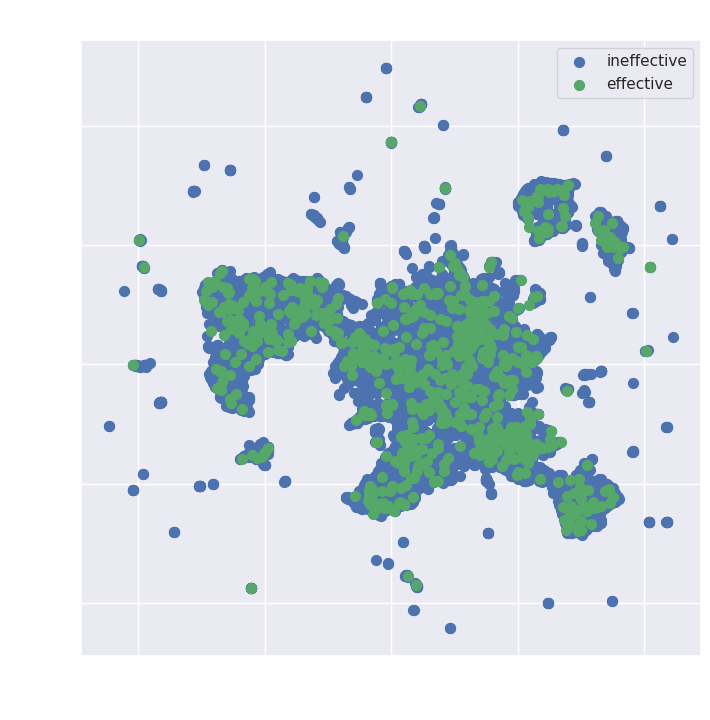

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 10 and metric euclidean:


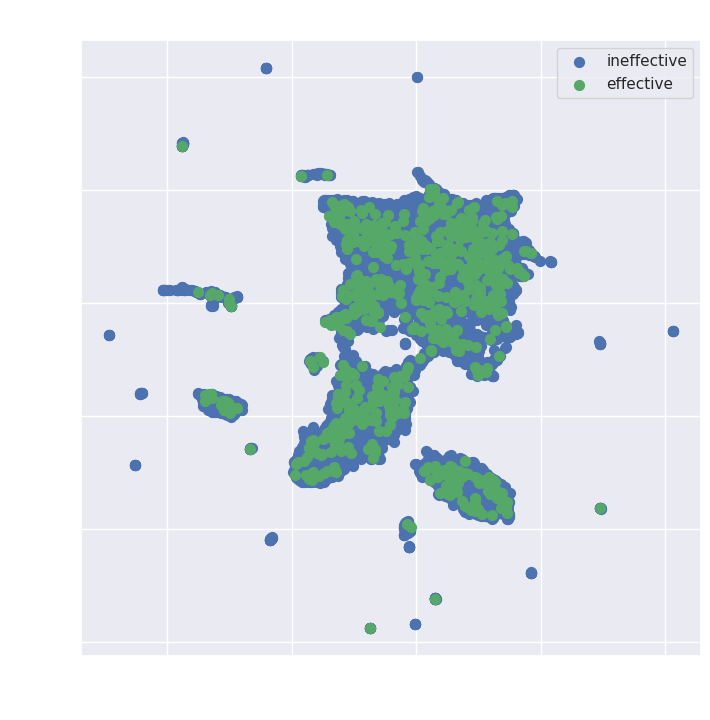

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 15 and metric euclidean:


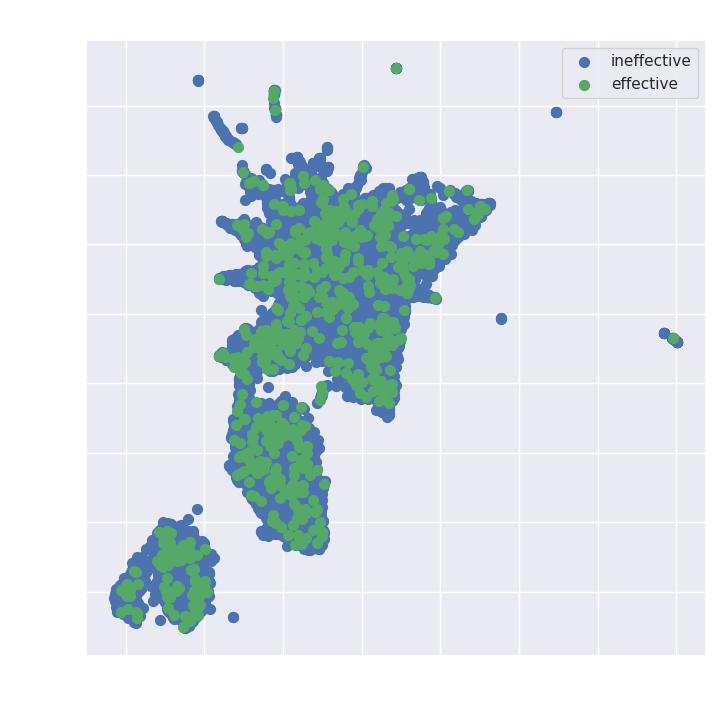

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 20 and metric euclidean:


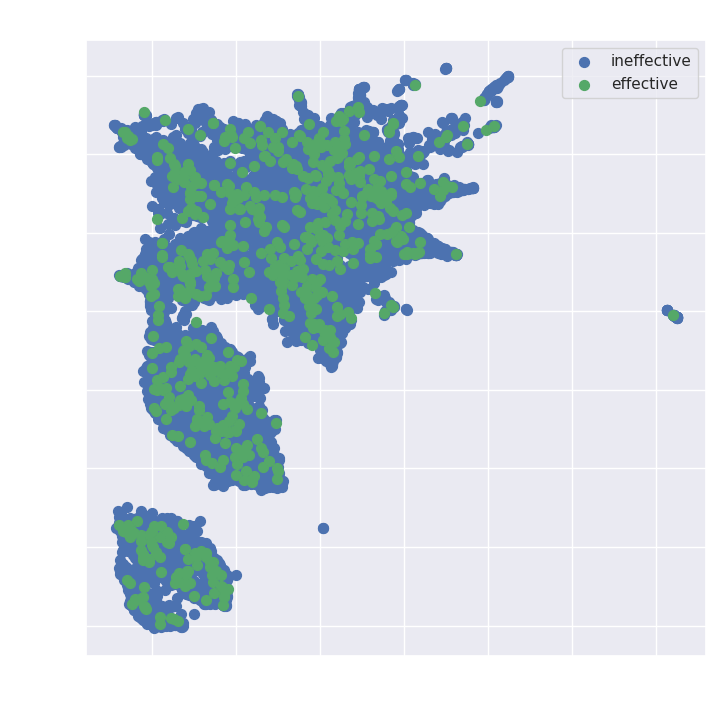

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 5 and metric manhattan:


/home/elba_ro/repos/github/conf22-style-transfer/.venv/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


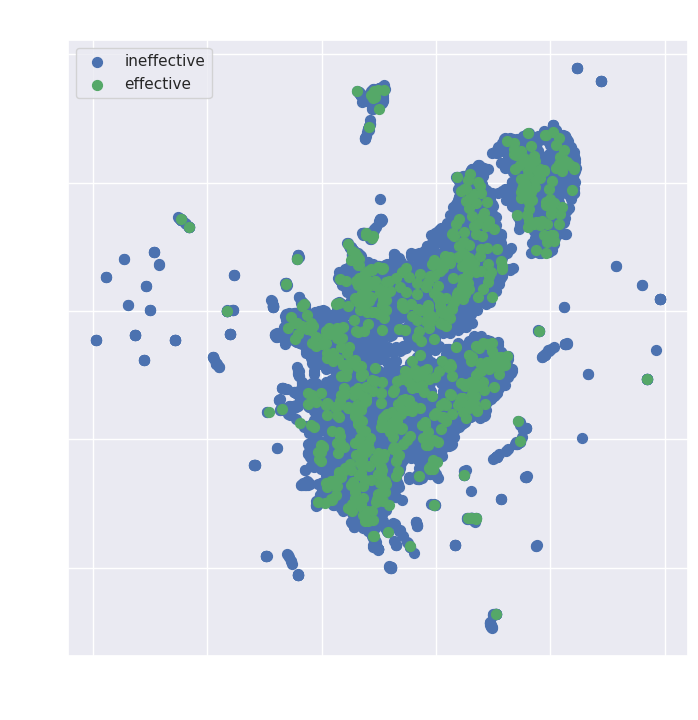

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 10 and metric manhattan:


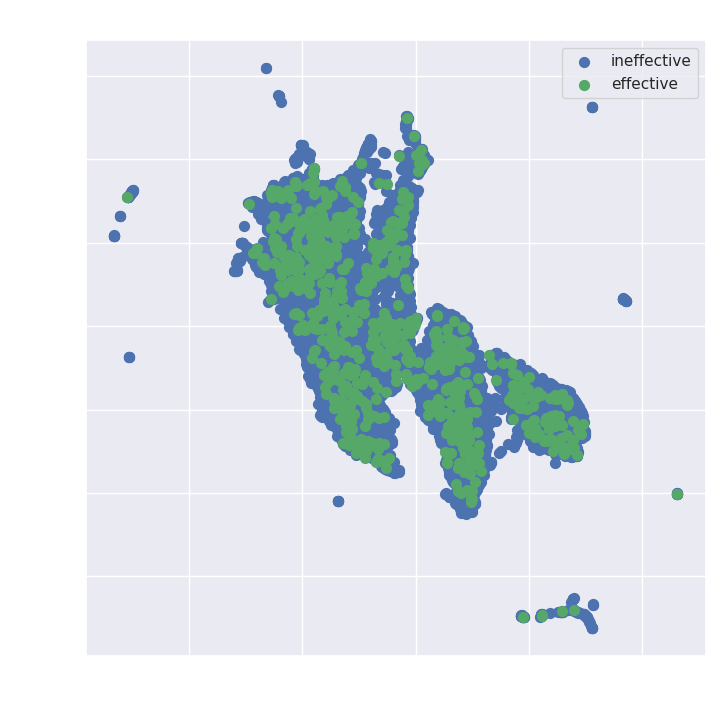

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 15 and metric manhattan:


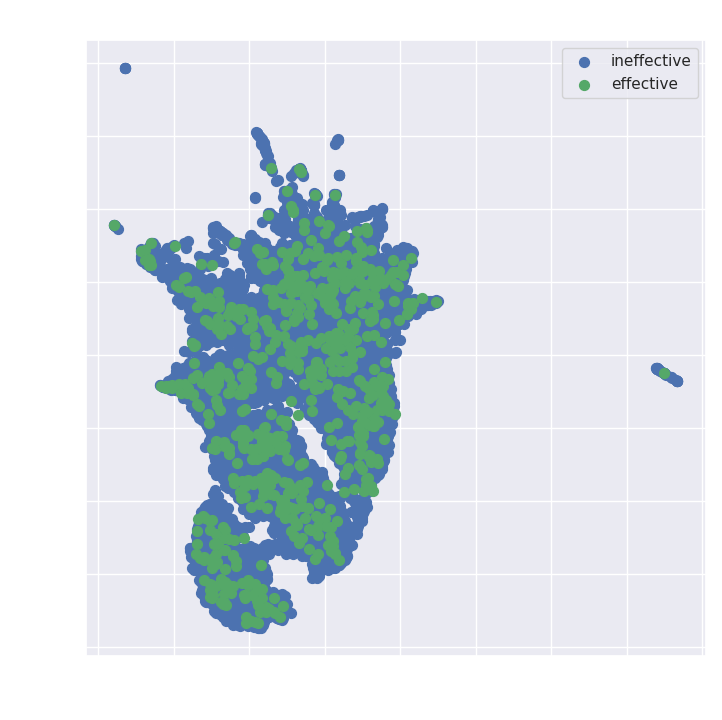

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 20 and metric manhattan:


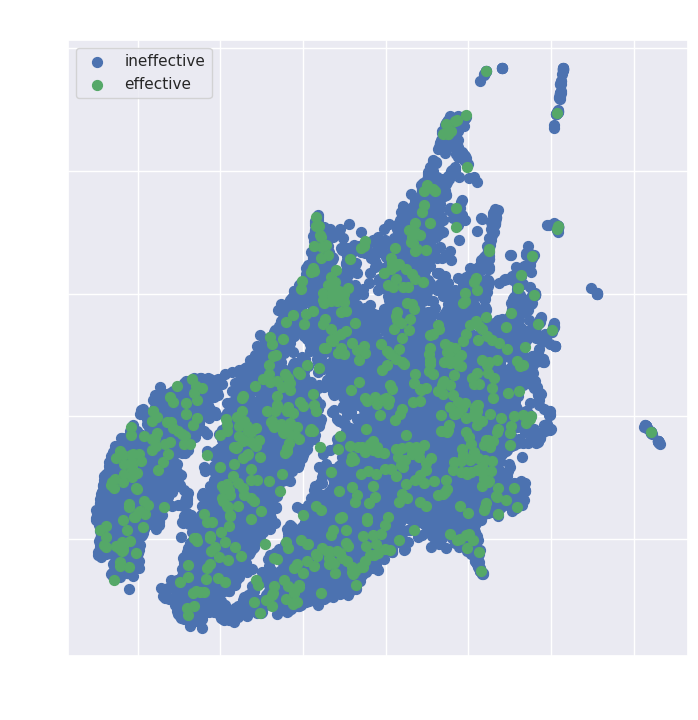

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 5 and metric cosine:


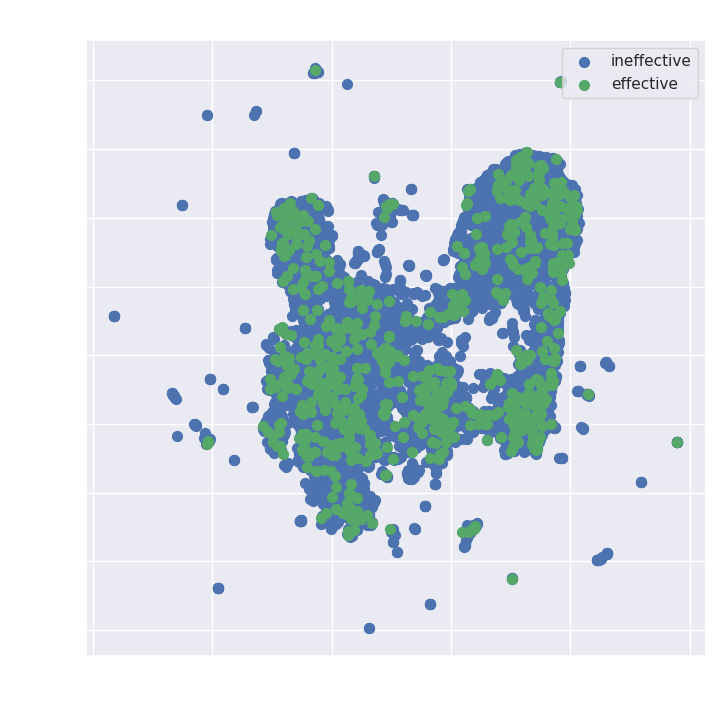

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 10 and metric cosine:


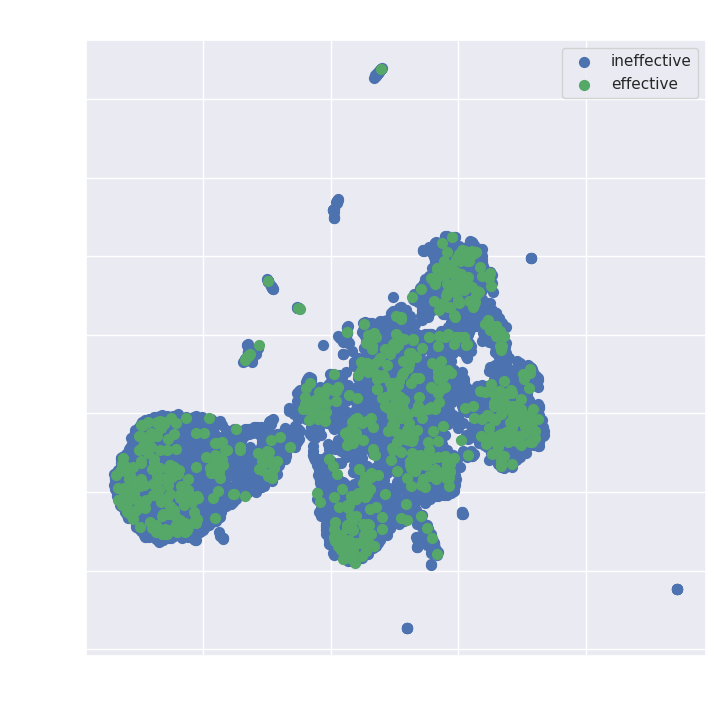

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 15 and metric cosine:


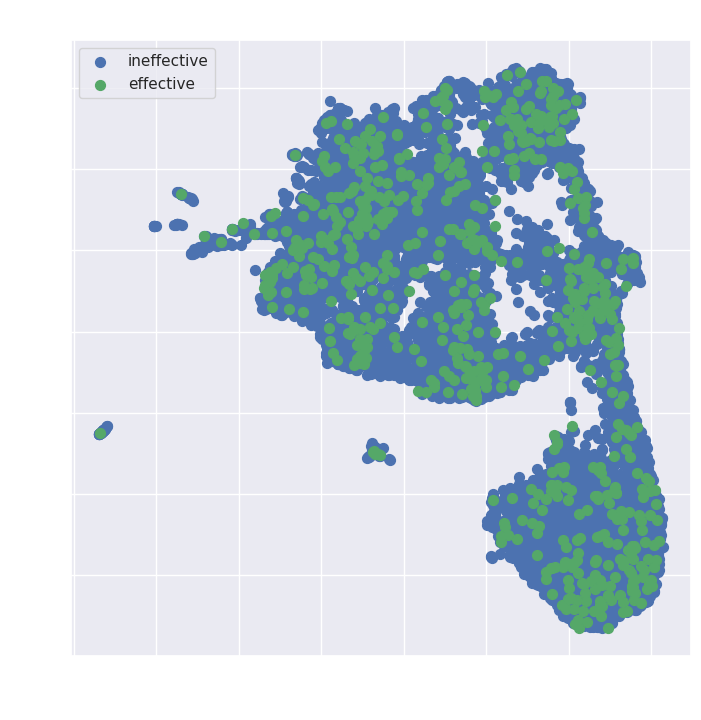

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 20 and metric cosine:


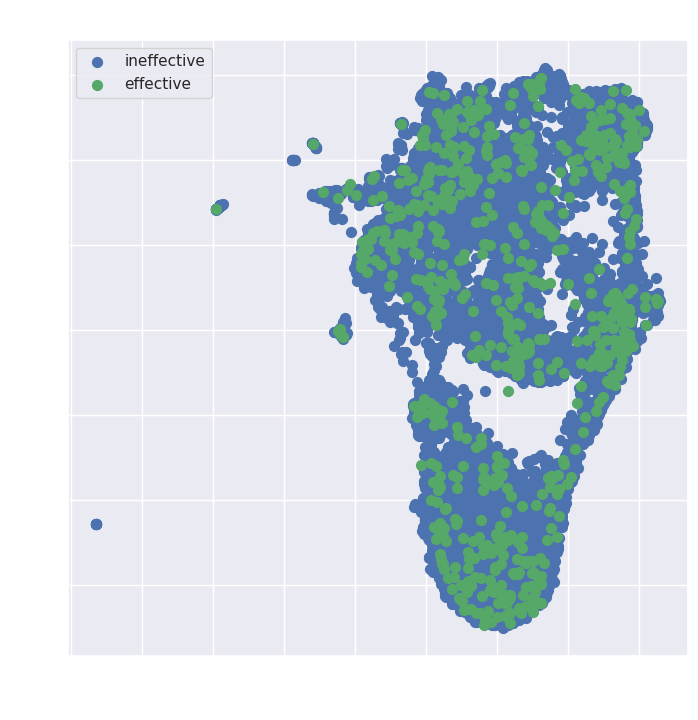

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 5 and metric correlation:


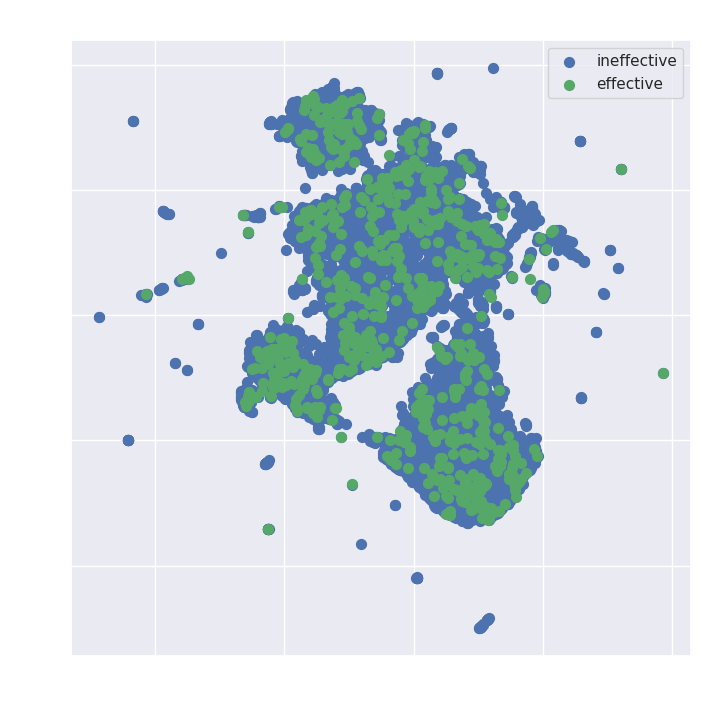

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 10 and metric correlation:


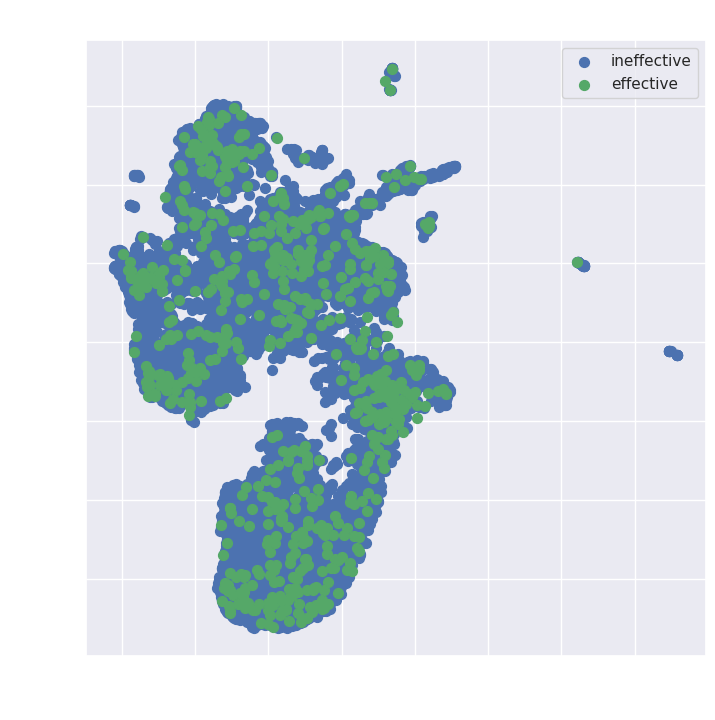

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 15 and metric correlation:


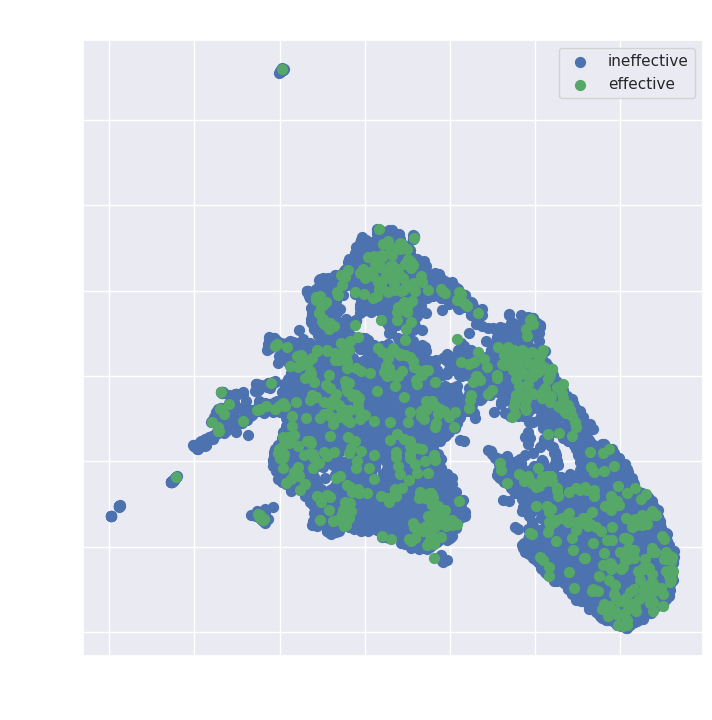

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 20 and metric correlation:


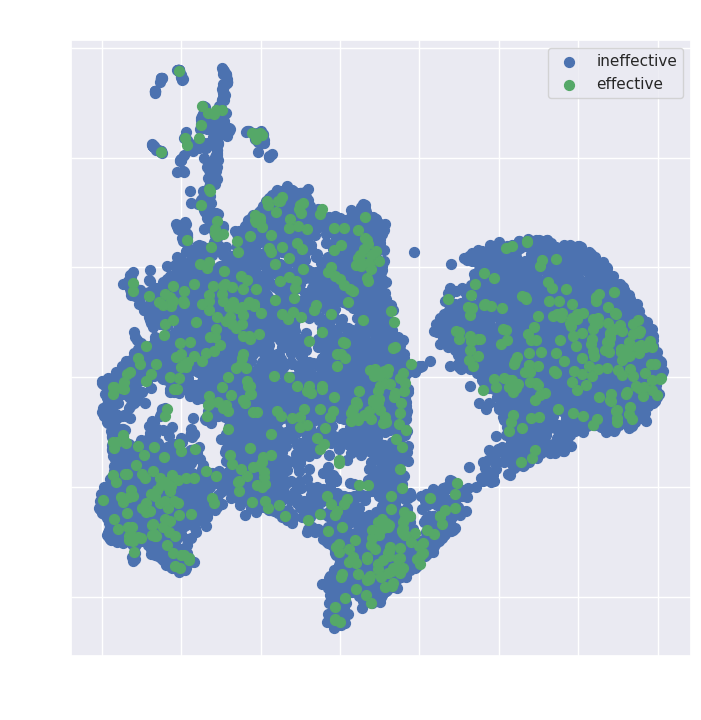

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 5 and metric mahalanobis:


/home/elba_ro/repos/github/conf22-style-transfer/.venv/lib/python3.9/site-packages/pynndescent/pynndescent_.py:937: UserWarning: Failed to correctly find n_neighbors for some samples. Results may be less than ideal. Try re-running with different parameters.
  warn(


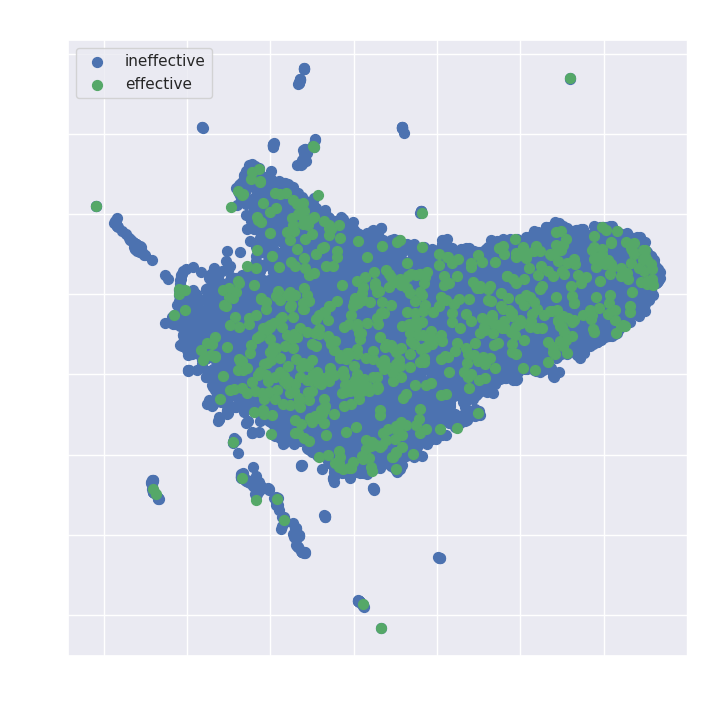

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 10 and metric mahalanobis:


/home/elba_ro/repos/github/conf22-style-transfer/.venv/lib/python3.9/site-packages/pynndescent/pynndescent_.py:937: UserWarning: Failed to correctly find n_neighbors for some samples. Results may be less than ideal. Try re-running with different parameters.
  warn(


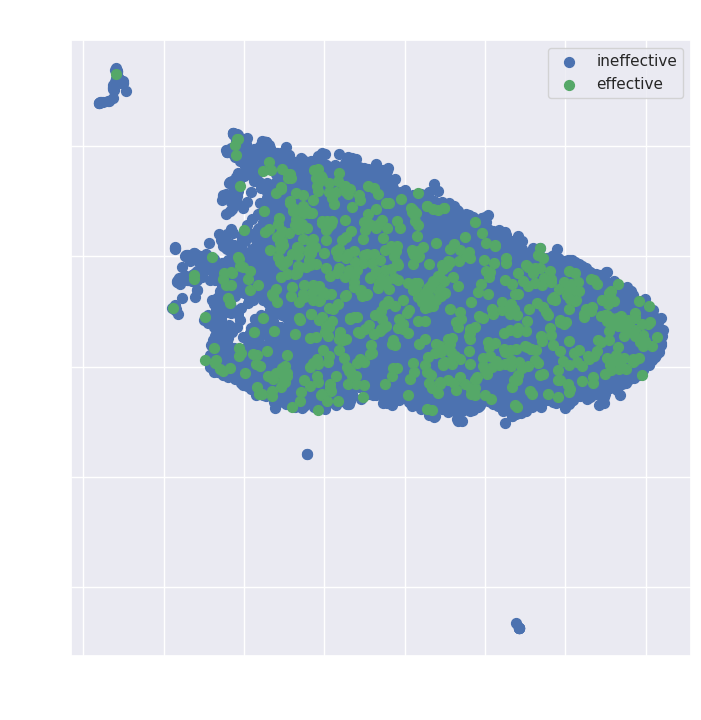

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 15 and metric mahalanobis:


/home/elba_ro/repos/github/conf22-style-transfer/.venv/lib/python3.9/site-packages/pynndescent/pynndescent_.py:937: UserWarning: Failed to correctly find n_neighbors for some samples. Results may be less than ideal. Try re-running with different parameters.
  warn(


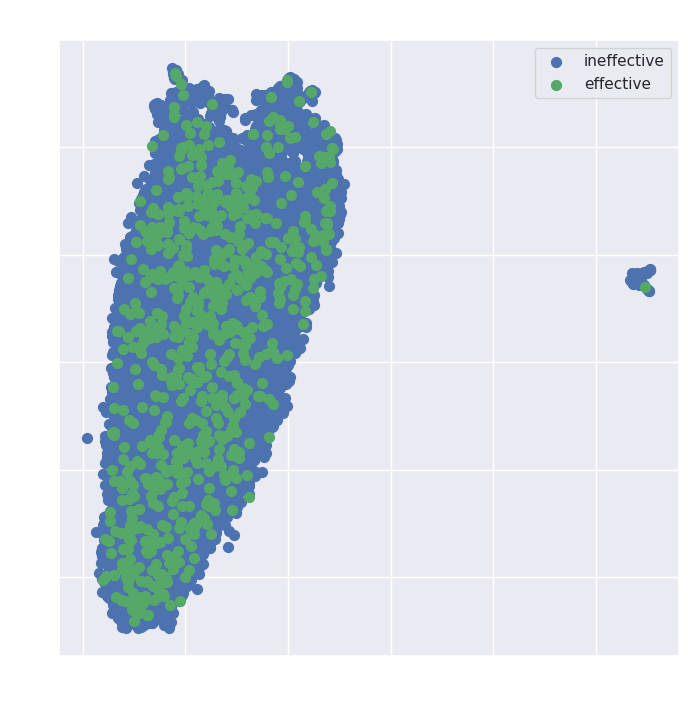

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 20 and metric mahalanobis:


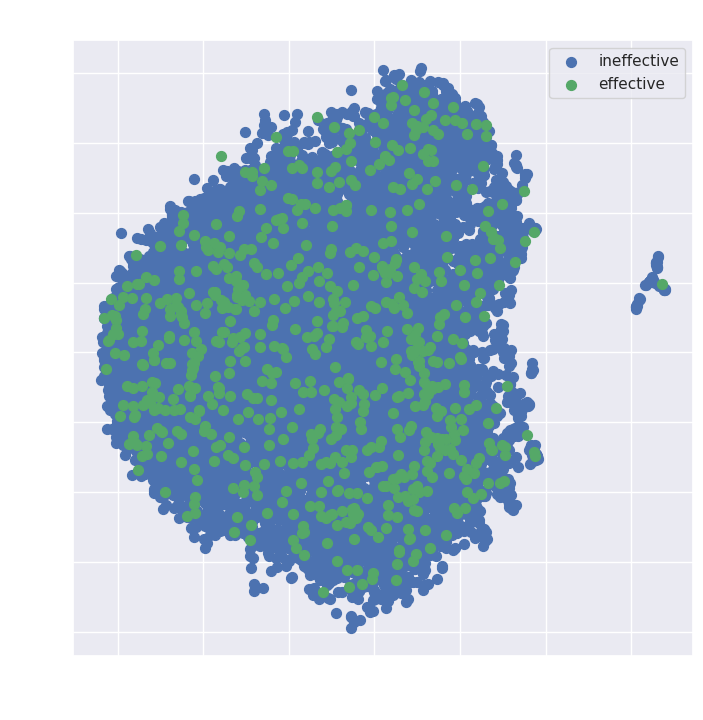

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 5 and metric jaccard:


/home/elba_ro/repos/github/conf22-style-transfer/.venv/lib/python3.9/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(
/home/elba_ro/repos/github/conf22-style-transfer/.venv/lib/python3.9/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/elba_ro/repos/github/conf22-style-transfer/.venv/lib/python3.9/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/home/elba_ro/repos/github/conf22-style-transfer/.venv/lib/python3.9/site-packages/umap/spectral.py:

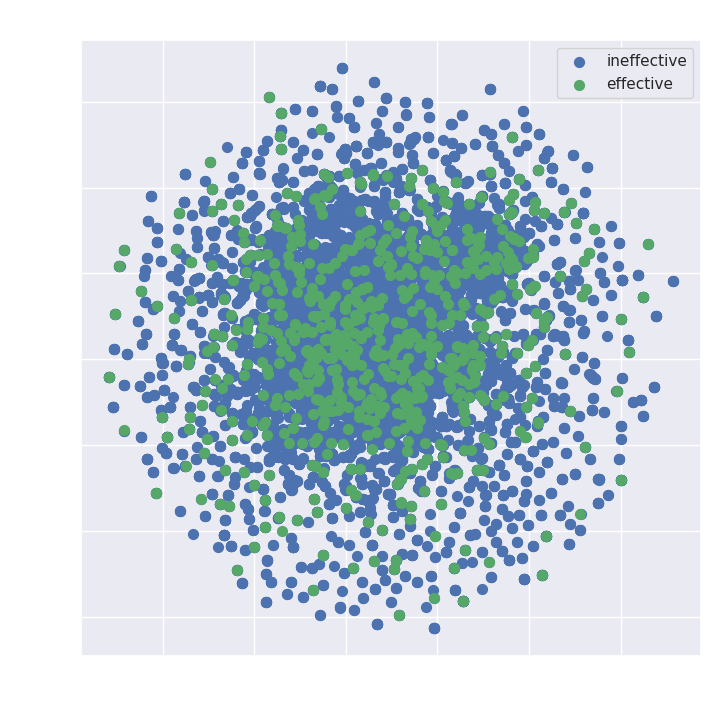

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 10 and metric jaccard:


/home/elba_ro/repos/github/conf22-style-transfer/.venv/lib/python3.9/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


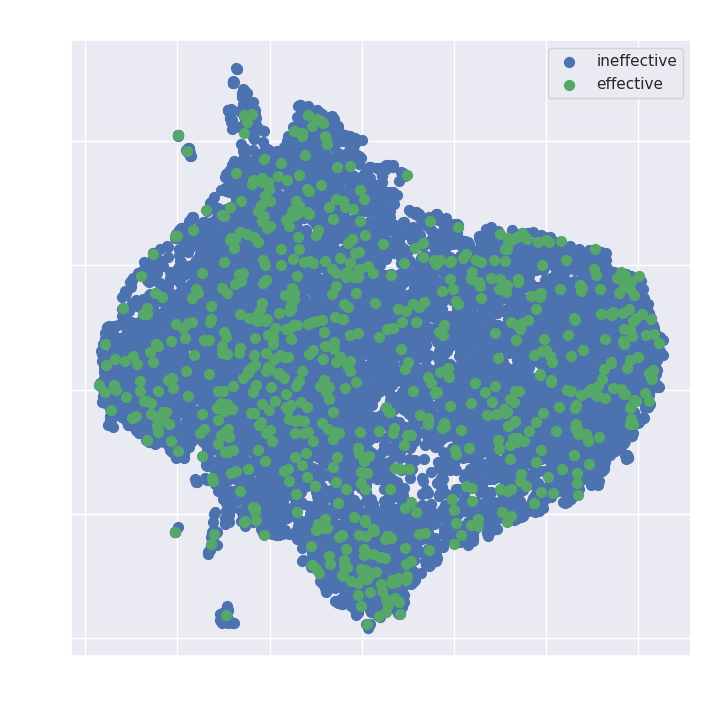

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 15 and metric jaccard:


/home/elba_ro/repos/github/conf22-style-transfer/.venv/lib/python3.9/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


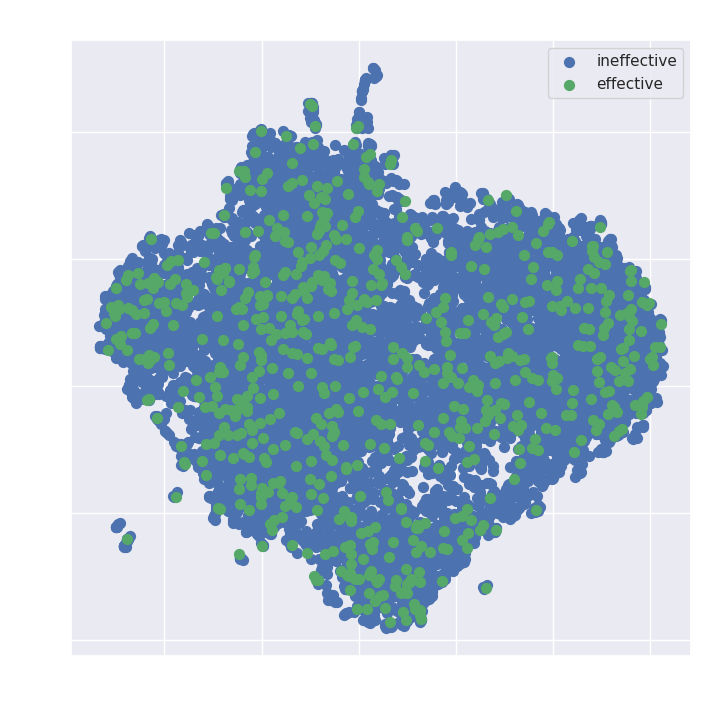

<Figure size 1600x1000 with 0 Axes>

*** FOR n_neighbor 20 and metric jaccard:


/home/elba_ro/repos/github/conf22-style-transfer/.venv/lib/python3.9/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


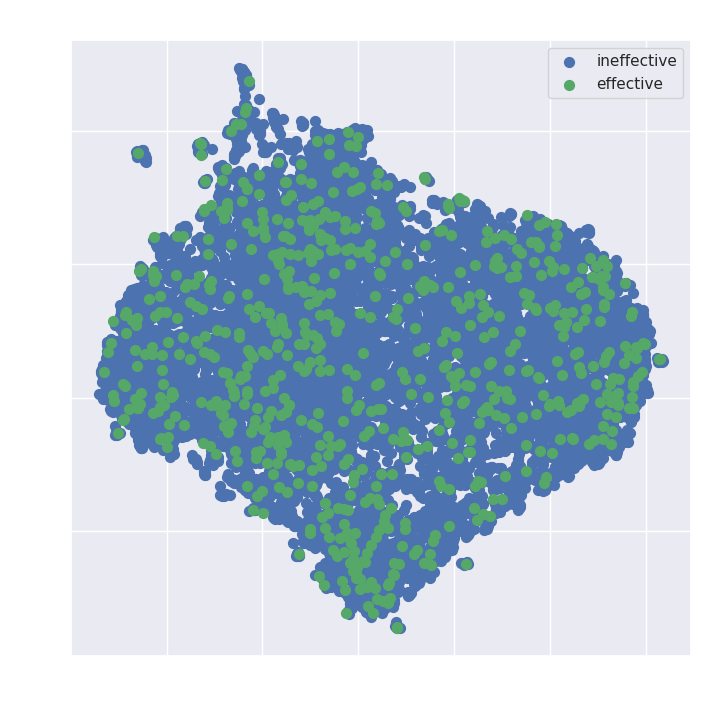

<Figure size 1600x1000 with 0 Axes>

In [46]:
n_neighbors = [5, 10, 15, 20]
n_components = 2
metrics = ["euclidean", "manhattan", "cosine", "correlation", "mahalanobis", "jaccard"]


for metric, n_neighbor in [(x, y) for x in metrics for y in n_neighbors]:
    params = {"n_neighbors": n_neighbor,
               "metric": metric,}
    
    print(f"*** FOR n_neighbor {n_neighbor} and metric {metric}:")
    _ = plot_reducer(feature_dfs["liberal"], "liberal", "UMAP", **params)



In [ ]:
_ = plot_reducer(feature_dfs["liberal"], "liberal", "TSNE")

In [ ]:
_ = plot_reducer(feature_dfs["liberal"], "liberal", "UMAP")

In [ ]:
top_examples["ineffective"]